In [4]:
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('./car.png')

In [5]:
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

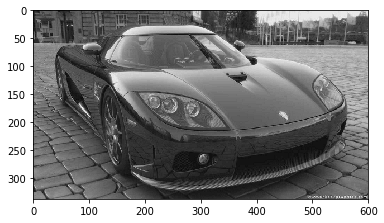

In [6]:
plt.imshow(img, cmap='gray')

In [7]:
img = np.asarray(img)

(array([1.000e+00, 2.200e+01, 3.090e+02, 4.293e+03, 4.762e+03, 5.539e+03,
        2.739e+03, 6.596e+03, 9.432e+03, 9.483e+03, 7.200e+03, 6.790e+03,
        3.513e+03, 6.723e+03, 6.972e+03, 7.485e+03, 8.553e+03, 9.570e+03,
        4.768e+03, 8.514e+03, 7.572e+03, 7.909e+03, 8.575e+03, 7.499e+03,
        3.644e+03, 6.223e+03, 5.333e+03, 4.502e+03, 3.410e+03, 2.881e+03,
        2.786e+03, 1.407e+03, 2.776e+03, 3.280e+03, 3.734e+03, 3.647e+03,
        2.904e+03, 1.129e+03, 1.609e+03, 1.323e+03, 1.415e+03, 1.214e+03,
        9.120e+02, 3.440e+02, 9.220e+02, 2.360e+03, 1.990e+02, 2.300e+01,
        3.000e+00, 1.000e+00]),
 array([ 93.  ,  94.84,  96.68,  98.52, 100.36, 102.2 , 104.04, 105.88,
        107.72, 109.56, 111.4 , 113.24, 115.08, 116.92, 118.76, 120.6 ,
        122.44, 124.28, 126.12, 127.96, 129.8 , 131.64, 133.48, 135.32,
        137.16, 139.  , 140.84, 142.68, 144.52, 146.36, 148.2 , 150.04,
        151.88, 153.72, 155.56, 157.4 , 159.24, 161.08, 162.92, 164.76,
        166.6 , 

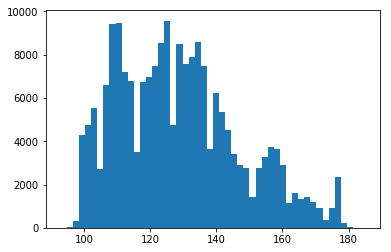

In [8]:

# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)

In [9]:
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

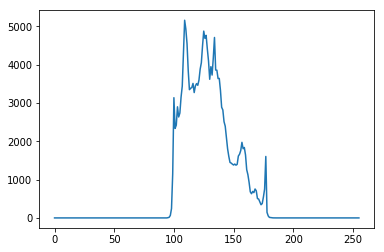

In [10]:
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

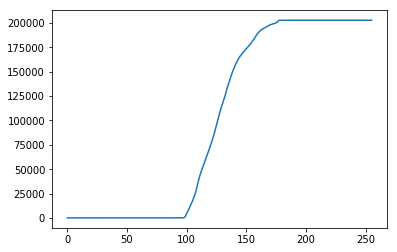

In [11]:
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

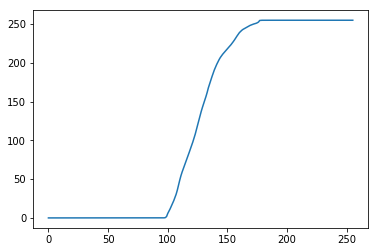

In [12]:

# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

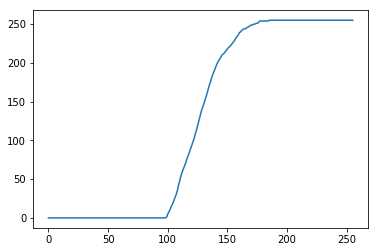

In [13]:
cs = cs.astype('uint8')

plt.plot(cs)

(array([4625., 2338., 5326., 2637., 2739., 6596., 4269.,    0., 5163.,
        4934., 4549., 3850., 3350., 6790., 3513., 3274., 3449., 3508.,
        3464., 3600., 3885., 4054., 4499., 4879., 4691., 4768., 4415.,
        4099., 3621., 3951., 3731., 4178., 4713., 3862., 3859., 3640.,
        3644., 3332., 5711., 2513., 6305., 4488., 2786., 4183., 5040.,
        3782., 3484., 4628., 3814., 4271.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

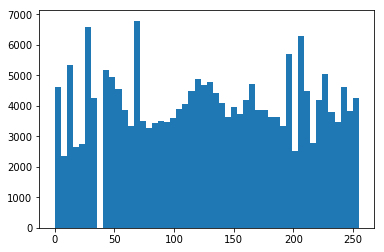

In [14]:
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=50)

In [15]:
img_new = np.reshape(img_new, img.shape)
img_new

array([[ 18,  30,  42, ..., 252, 254, 252],
       [ 15,  22,  26, ..., 251, 254, 254],
       [ 18,  30,  35, ..., 250, 251, 252],
       ...,
       [201, 201, 201, ..., 229, 211, 198],
       [201, 201, 201, ..., 151, 167, 201],
       [201, 201, 201, ...,  93,  98, 167]], dtype=uint8)

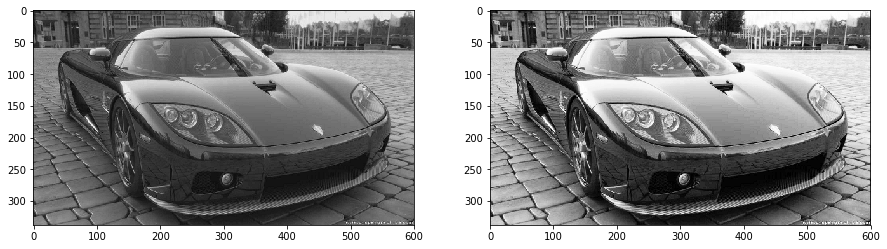

In [16]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)